In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão de Python Neste Jupyter Notebook:', python_version())

# usaremos o filtro 'warning' para deixar mais limpo.
import warnings
warnings.filterwarnings('ignore')

### Stock Simulations

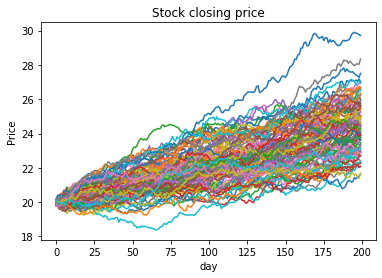

In [1]:
import matplotlib.pyplot as plt, numpy as np
from scipy import stats

def cum_price(p, d, m, s):
    data = []

    for d in range(d):
        prob = stats.norm.rvs(loc=m, scale=s)
        price = (p * prob)
        data.append(price)
        p = price

    return data

if __name__ == "__main__":
    stk_price, days, mu, sigma = 20, 200, 1.001, 0.005
    x = 0
    while x < 100:
        data = cum_price(stk_price, days, mu, sigma)
        plt.plot(data)
        x += 1

    plt.ylabel('Price')
    plt.xlabel('day')
    plt.title('Stock closing price')
    plt.show()

### Product Demand Simulation

Profit for 10,000 units: $25,000.00
Profit for 20,000 units: $45,900.80
Profit for 40,000 units: $57,290.20
Profit for 60,000 units: $44,819.40


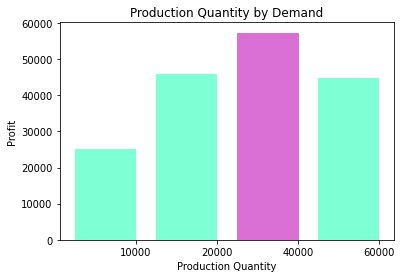

In [2]:
import matplotlib.pyplot as plt, numpy as np

def demand():
    p = np.random.uniform(0,1)
    if p < 0.10:
        return 10000
    elif p >= 0.10 and p < 0.45:
        return 20000
    elif p >= 0.45 and p < 0.75:
        return 40000
    else:
        return 60000

def production(demand, units, price, unit_cost, disposal):
    units_sold = min(units, demand)
    revenue = units_sold * price
    total_cost = units * unit_cost
    units_not_sold = units - demand
    
    if units_not_sold > 0:
        disposal_cost = disposal * units_not_sold
    else:
        disposal_cost = 0
    
    profit = revenue - total_cost - disposal_cost
    
    return profit

def mcs(x, n, units, price, unit_cost, disposal):
    profit = []

    while x <= n:
        d = demand()
        v = production(d, units, price, unit_cost, disposal)
        profit.append(v)
        x += 1

    return profit

def max_bar(ls):
    tup = max(enumerate(ls))
    return tup[0] - 1

if __name__ == "__main__":
    units = [10000, 20000, 40000, 60000]
    price, unit_cost, disposal = 4, 1.5, 0.2
    avg_p = []
    x, n = 1, 10000
    profit_10 = mcs(x, n, units[0], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_10))
    print ('Profit for {:,.0f}'.format(units[0]),    
           'units: ${:,.2f}'.format(np.mean(profit_10)))
    
    profit_20 = mcs(x, n, units[1], price, unit_cost, disposal)
    avg_p.append(np.mean(np.mean(profit_20)))
    print ('Profit for {:,.0f}'.format(units[1]),
           'units: ${:,.2f}'.format(np.mean(profit_20)))
    
    profit_40 = mcs(x, n, units[2], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_40))
    print ('Profit for {:,.0f}'.format(units[2]),
           'units: ${:,.2f}'.format(np.mean(profit_40)))
    
    profit_60 = mcs(x, n, units[3], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_60))
    print ('Profit for {:,.0f}'.format(units[3]),
           'units: ${:,.2f}'.format(np.mean(profit_60)))
    
    labels = ['10000','20000','40000','60000']
    pos = np.arange(len(labels))
    width = 0.75 # set less than 1.0 for spaces between bins
    
    plt.figure(2)
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(labels)
    barlist = plt.bar(pos, avg_p, width, color='aquamarine')
    barlist[max_bar(avg_p)].set_color('orchid')
    plt.ylabel('Profit')
    plt.xlabel('Production Quantity')
    plt.title('Production Quantity by Demand')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt, numpy as np

def demand():
    p = np.random.uniform(0,1)
    if p < 0.10:
        return 10000
    elif p >= 0.10 and p < 0.45:
        return 20000
    elif p >= 0.45 and p < 0.75:
        return 40000
    else:   
        return 60000

def production(demand, units, price, unit_cost, disposal):
    units_sold = min(units, demand)
    revenue = units_sold * price
    total_cost = units * unit_cost
    units_not_sold = units - demand
    
    if units_not_sold > 0:
        disposal_cost = disposal * units_not_sold
    else:
        disposal_cost = 0
    profit = revenue - total_cost - disposal_cost
    
    return profit

def mcs(x, n, units, price, unit_cost, disposal):
    profit = []
    while x <= n:
        d = demand()
        v = production(d, units, price, unit_cost, disposal)
        profit.append(v)
        x += 1

    return profit

def display(p, i):
    print ('Profit for {:,.0f}'.format(units[i]),
           'units: ${:,.2f}'.format(np.mean(p)))

if __name__ == "__main__":
    units = [10000, 20000, 40000, 60000]
    price, unit_cost, disposal = 4, 1.5, 0.2
    avg_ls = []
    x, n, y, z = 1, 10000, 1, 1000
    while y <= z:
        profit_10 = mcs(x, n, units[0], price, unit_cost,
                        disposal)
        
        profit_20 = mcs(x, n, units[1], price, unit_cost,       
                        disposal)
        
        avg_profit = np.mean(profit_20)
        profit_40 = mcs(x, n, units[2], price, unit_cost,        
                        disposal)
        
        avg_profit = np.mean(profit_40)
        profit_60 = mcs(x, n, units[3], price, unit_cost,
                        disposal)
        
        avg_profit = np.mean(profit_60)
        avg_ls.append({'p10':np.mean(profit_10),
                       'p20':np.mean(profit_20),
                       'p40':np.mean(profit_40),
                       'p60':np.mean(profit_60)})
        y += 1
        
        mcs_p10, mcs_p20, mcs_p40, mcs_p60 = [], [], [], []

    for row in avg_ls:
        mcs_p10.append(row['p10'])
        mcs_p20.append(row['p20'])
        mcs_p40.append(row['p40'])
        mcs_p60.append(row['p60'])

    display(np.mean(mcs_p10), 0)
    display(np.mean(mcs_p20), 1)
    display(np.mean(mcs_p40), 2)
    display(np.mean(mcs_p60), 3)

### Randomness Using Probability and Cumulative Density Functions

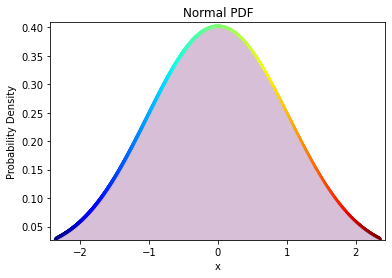

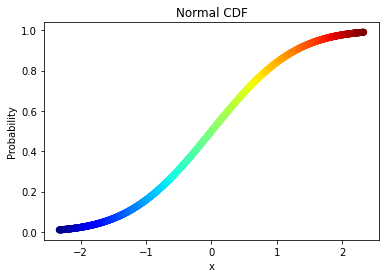

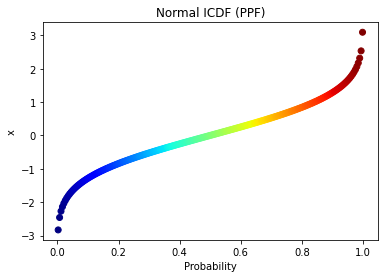

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

if __name__ == '__main__':
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), num=1000)
    y1 = norm.pdf(x)
    plt.figure('PDF')
    plt.xlim(x.min()-.1, x.max()+0.1)
    plt.ylim(y1.min(), y1.max()+0.01)
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Normal PDF')
    plt.scatter(x, y1, c=x, cmap='jet')
    plt.fill_between(x, y1, color='thistle')
    plt.show()
    plt.close('PDF')
    plt.figure('CDF')
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Normal CDF')

    y2 = norm.cdf(x)
    plt.scatter(x, y2, c=x, cmap='jet')
    plt.show()
    plt.close('CDF')
    plt.figure('ICDF')
    plt.xlabel('Probability')
    plt.ylabel('x')
    plt.title('Normal ICDF (PPF)')

    y3 = norm.ppf(x)
    plt.scatter(x, y3, c=x, cmap='jet')
    plt.show()
    plt.close('ICDF')

In [ ]:
from scipy.stats import norm
import numpy as np

def np_rstrip(v):
    return np.char.rstrip(v.astype(str), '.0')

def transform(t):
    one, two = round(t[0]), round(t[1])
    return (np_rstrip(one), np_rstrip(two))

if __name__ == "__main__":
    mu, sigma = 1000, 300
    
    print ('Expected failure rates:')
    
    fail = np_rstrip(round(norm.ppf(0.05, loc=mu, scale=sigma)))
    print ('5% fail within', fail, 'hours')
    
    fail_range = norm.interval(0.95, loc=mu, scale=sigma)
    lo, hi = transform(fail_range)
    print ('95% fail between', lo, 'and', hi, end=' ')
    print ('hours of usage')
    print ('\nExpected survival rates:')
    
    last = np_rstrip(round(norm.ppf(0.95, loc=mu, scale=sigma)))
    print ('5% survive up to', last, 'hours of usage')
    
    last_range = norm.interval(0.05, loc=mu, scale=sigma)
    lo, hi = transform(last_range)
    print ('95% survive between', lo, 'and', hi, 'hours of usage')

$3,465,339.00 (profit) for order: 180
$3,638,563.00 (profit) for order: 200
$3,670,908.50 (profit) for order: 220
$3,551,137.50 (profit) for order: 240
$3,403,328.50 (profit) for order: 260
$3,187,178.00 (profit) for order: 280
$2,979,948.00 (profit) for order: 300

Maximum profit $3,670,908.50 for order 220


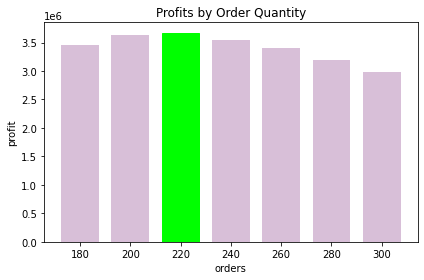

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def str_int(s):
    val = "%.2f" % profit
    return float(val)

if __name__ == "__main__":
    orders = [180, 200, 220, 240, 260, 280, 300]
    mu, sigma, n = 200, 30, 10000
    cost, price, discount = 25000, 45000, 30000
    profit_ls = []

    for order in orders:
        x = 1
        profit_val = []
        inv_cost = order * cost
        while x <= n:
            demand = round(np.random.normal(mu, sigma))
            if demand < order:
                diff = order - demand
    
                if diff > 0:
                    damt = round(abs(diff) / 2) * discount
                    profit = (demand * price) - inv_cost + damt
                else:
                    profit = (order * price) - inv_cost

            else:
                    profit = (order * price) - inv_cost
            profit = str_int(profit)
            profit_val.append(profit)
            x += 1  
        
        avg_profit = np.mean(profit_val)
        profit_ls.append(avg_profit)
        print ('${0:,.2f}'.format(avg_profit), '(profit)',   
            'for order:', order)
    
    max_profit = max(profit_ls)
    profit_np = np.array(profit_ls)
    max_ind = np.where(profit_np == profit_np.max())
    print ('\nMaximum profit', '${0:,.2f}'.format(max_profit),      
           'for order', orders[int(max_ind[0])])
    
    barlist = plt.bar(orders, profit_ls, width=15,  
                      color='thistle')
    
    barlist[int(max_ind[0])].set_color('lime')
    
    plt.title('Profits by Order Quantity')
    plt.xlabel('orders')
    plt.ylabel('profit')
    plt.tight_layout()
    plt.show()

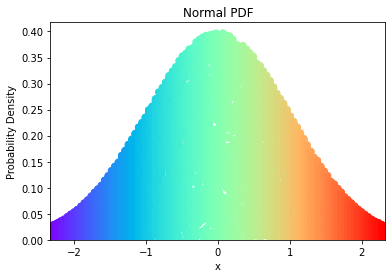

In [5]:
import matplotlib.pyplot as plt, numpy as np
from scipy.stats import norm

if __name__ == '__main__':
    n = 100
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), num=n)
    y = norm.pdf(x)
    dic = {}
    
    for i, row in enumerate(y):
        dic[x[i]] = [np.random.uniform(0, row) for _ in range(n)]
    
    xs = []
    ys = []
    for key, vals in dic.items():
        for y in vals:
            xs.append(key)
            ys.append(y)
        
    plt.xlim(min(xs), max(xs))
    plt.ylim(0, max(ys)+0.02)
    plt.title('Normal PDF')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.scatter(xs, ys, c=xs, cmap='rainbow')
    plt.show()

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.